<h1 style="font-size:300%;"> Predicting World Movie Box Office Sales Using KKN Regression </h1>

<h2> Introduction </h2>

Sales projections are important in the film industry because they help production companies predict whether a project will be profitable and can be used to determine financial risk. Our project will investigate what the projected world sales are for a movie released since 2010 given its genres, runtime, distributor, and license. To answer this question, we will be exploring a [data set containing the 1000 highest grossing movies in Hollywood](https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies).   

The columns in this dataset are:
<ul>
    <li> Title: movie title </li>
    <li> Movie Info: short description of the movie </li>
    <li> Distributor: the company that is responsible for marketing and making the movie accessible to the public </li>
    <li> Release Date: the date when the movie was released </li>
    <li> Domestic Sales in USD </li>
    <li> International Sales in USD </li>
    <li> World Sales in USD </li>
    <li> Genre: The category of film that defines a film based on its stylistic, narrative or thematic elements </li>
    <li> Movie Runtime: length of movie (..hr..min) </li>
</ul>  

## Preliminary Exploratory Data Analysis

In [1]:
# set up
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
library(gridExtra)
options(repr.matrix.max.rows = 6)
set.seed(22)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### Reading, Cleaning, and Wrangling Data

To produce consistent results, we set a seed before starting the project. This ensures that our model is created using random but reproducible data. 

To begin, the untidy dataset was read into the notebook from Kaggle. To tidy our dataset, we first removed the white spaces in the column headers by replacing the spaces with periods. This allowed us to reference these column names as objects in functions used in data analysis. 

In [2]:
# reading in data
url <- "https://raw.githubusercontent.com/karlie-tr/dataset/main/Highest%20Holywood%20Grossing%20Movies.csv"
download.file(url, destfile = "highest-hollywood-grossing-movies.csv")
movies_data <- read_csv("highest-hollywood-grossing-movies.csv")

# remove white space in headers
colnames(movies_data) <- make.names(colnames(movies_data))
movies_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  Title = col_character(),
  `Movie Info` = col_character(),
  Distributor = col_character(),
  `Release Date` = col_character(),
  `Domestic Sales (in $)` = col_double(),
  `International Sales (in $)` = col_double(),
  `World Sales (in $)` = col_double(),
  Genre = col_character(),
  `Movie Runtime` = col_character(),
  License = col_character()
)



X1,Title,Movie.Info,Distributor,Release.Date,Domestic.Sales..in...,International.Sales..in...,World.Sales..in...,Genre,Movie.Runtime,License
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a desert scavenger, and Finn, an ex-stormtrooper, must join Han Solo and Chewbacca to search for the one hope of restoring peace.",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),"After the devastating events of Avengers: Infinity War, the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.",Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
915,Eat Pray Love (2010),"A married woman realizes how unhappy her marriage really is, and that her life needs to go in a different direction. After a painful divorce, she takes off on a round-the-world journey to ""find herself"".",Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),"After picking up a traumatized young hitchhiker, five friends find themselves stalked and hunted by a deformed chainsaw-wielding loon and his family of equally psychopathic killers.",New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R
917,Zookeeper (2011),"A group of zoo animals decide to break their code of silence in order to help their lovable zookeeper find love, without opting to leave his current job for something more illustrious.",Sony Pictures Entertainment (SPE),"July 6, 2011",80360843,89491916,169852759,"['Comedy', 'Family', 'Fantasy', 'Romance']",1 hr 42 min,PG


Next, we selected the columns that were required to filter the dataset (release date)  and the variables we wanted to explore as predictors (distributor, release date, sales, genre, runtime and license). Once these variables were selected, we changed the column names for easier referencing and removed all the white space in the dataset to help us filter observations. 

Our project aims to create a regression model that can accurately predict sales of new movies. Given the rapidly changing nature of the film industry, we chose to only consider more recent films. To do so, we separated the year from the release date column and the movie title and then filtered for films released since 2010. 

In [3]:
# remove unusable columns
vars <- c("Title", "Distributor","Release.Date","World.Sales..in...","Genre","Movie.Runtime","License") # vars that we want to keep
movies_data_filtered <- movies_data %>%
                        select(all_of(vars))

# change column name
colnames(movies_data_filtered) <- c("Title","Distributor","Release_Date","World_Sales","Genre","Runtime","License")

# remove all white space in dataframe
movies_data_no_space <- as.data.frame(apply(movies_data_filtered, 2, str_remove_all, " "))

# separate release year from Release_Date
movies_release_date <- separate(movies_data_no_space,
                            col = Release_Date,
                            into = c("date", "Release_Year"),
                            sep = ","
                           )

# separate release year from movie title
movies_release_date <- separate(movies_release_date,
                            col = Title,
                            into = c("Title", "year"),
                            sep = "[()]"
                           )

# filter for movies released since 2010
movies_2010 <- movies_release_date %>%
                    select(-date, -year) %>%
                    filter(Release_Year >= 2010)
      

#movies_2010                 

Warning message:
“Expected 2 pieces. Additional pieces discarded in 918 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


The original data frame reported the time in hours and minutes, which was difficult to treat as a numerical variable. To tidy this column, we separated the runtime into hours and minutes, created a new variable containing the total duration in minutes and merged the new column with the tidy dataframe. At this point, we also converted our character variables to factors.

In [4]:
# tidying Runtime column
movies_2010_separate_runtime <- separate(movies_2010,
                                            col = Runtime,
                                            into = c("Runtime_hr", "Runtime_min"),
                                            sep = "hr"
                                         )
# remove min from Runtime_min
movies_2010_separate_minute <- separate(movies_2010_separate_runtime,
                                        col = Runtime_min,
                                        into = c("Runtime_min"),
                                        sep = "min"
                                       )

# change hr and time into duration (minutes)
numeric_duration <- movies_2010_separate_minute %>%
                    select(Runtime_hr, Runtime_min) %>%
                    as.data.frame() %>%
                    mutate(Runtime_hr = as.numeric(Runtime_hr)) %>%
                    mutate(Runtime_min = as.numeric(Runtime_min)) %>%
                    mutate(Duration = Runtime_hr * 60 + Runtime_min, na.rm =TRUE) %>%
                    select(Duration)

# Merge Duration (runtime in minutes) with movies_2010 and convert character columns to factors
movies_2010_tidy <- movies_2010 %>%
                    select(-Runtime,-Title, -Release_Year) %>%
                    cbind(numeric_duration) %>%                                 # bind the new column into the df
                    mutate(World_Sales = as.numeric(World_Sales),
                           Distributor = as.factor(Distributor),
                           License = as.factor(License)) %>%
                    na.omit()

#movies_2010_tidy



Warning message:
“Expected 1 pieces. Additional pieces discarded in 352 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


LEAVING THIS FOR SKYE THANK YOU!

In [5]:
# tidying genre data

# creating list of included genres
genre_list <- movies_2010_tidy %>%
    select(Genre) %>%
    # remove brackets, quotation marks, and spaces from string
    mutate(Genre = str_replace_all(string = Genre, pattern = regex("[]\\[\' ]"), replacement = "")) %>% 
    # change string into list
    mutate(Genre = as.list(strsplit(Genre, ","))) %>%
    # make a list of all unique values
    pull() %>%
    flatten() %>%
    unique()

# creating columns for each genre
movies_genres <- movies_2010_tidy
for(i in genre_list)
  { 
    movies_genres <- movies_genres %>%
        mutate(!!i := str_detect(Genre, i))
}

#movies_genres


movies_tidy <- select(movies_genres, -Genre) %>%
    mutate(across(Action:Documentary, as.numeric)) %>%
    as_tibble()
#glimpse(movies_tidy)
movies_tidy

Distributor,World_Sales,License,Duration,Action,Adventure,Sci-Fi,Drama,Fantasy,Animation,⋯,Thriller,War,Biography,Mystery,Horror,Music,Sport,History,Western,Documentary
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WaltDisneyStudiosMotionPictures,2069521700,PG-13,138,1,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
WaltDisneyStudiosMotionPictures,2797501328,PG-13,181,1,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
UniversalPictures,1670516444,PG-13,124,1,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
UniversalPictures,215863606,R,115,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SonyPicturesEntertainment(SPE),204594016,PG-13,133,0,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,0
SonyPicturesEntertainment(SPE),169852759,PG,102,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


COME BACK AND EXPLIN WHY WE NEED TO SPLIT AND WHY WE USED THE RATIO WE CHOSE

In [6]:
# split data into training and testing set
movies_split <- initial_split(movies_tidy, prop = 0.75, strata = World_Sales)
movies_train <- training(movies_split)
movies_test <- testing(movies_split)

#### Exploratory Data Analysis on Training Data

In [7]:
# table showing distributors within the top grossing movies released since 2010

movies_summary <- movies_train %>%
    summarise(mean = mean(World_Sales),
             median = median(World_Sales),
             standard_deviation = sd(World_Sales),
             min = min(World_Sales),
             max = max(World_Sales))

movies_summary

mean,median,standard_deviation,min,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
463167251,357537980,324367711,86086881,2069521700


*Table 1*: Summary of World Sales

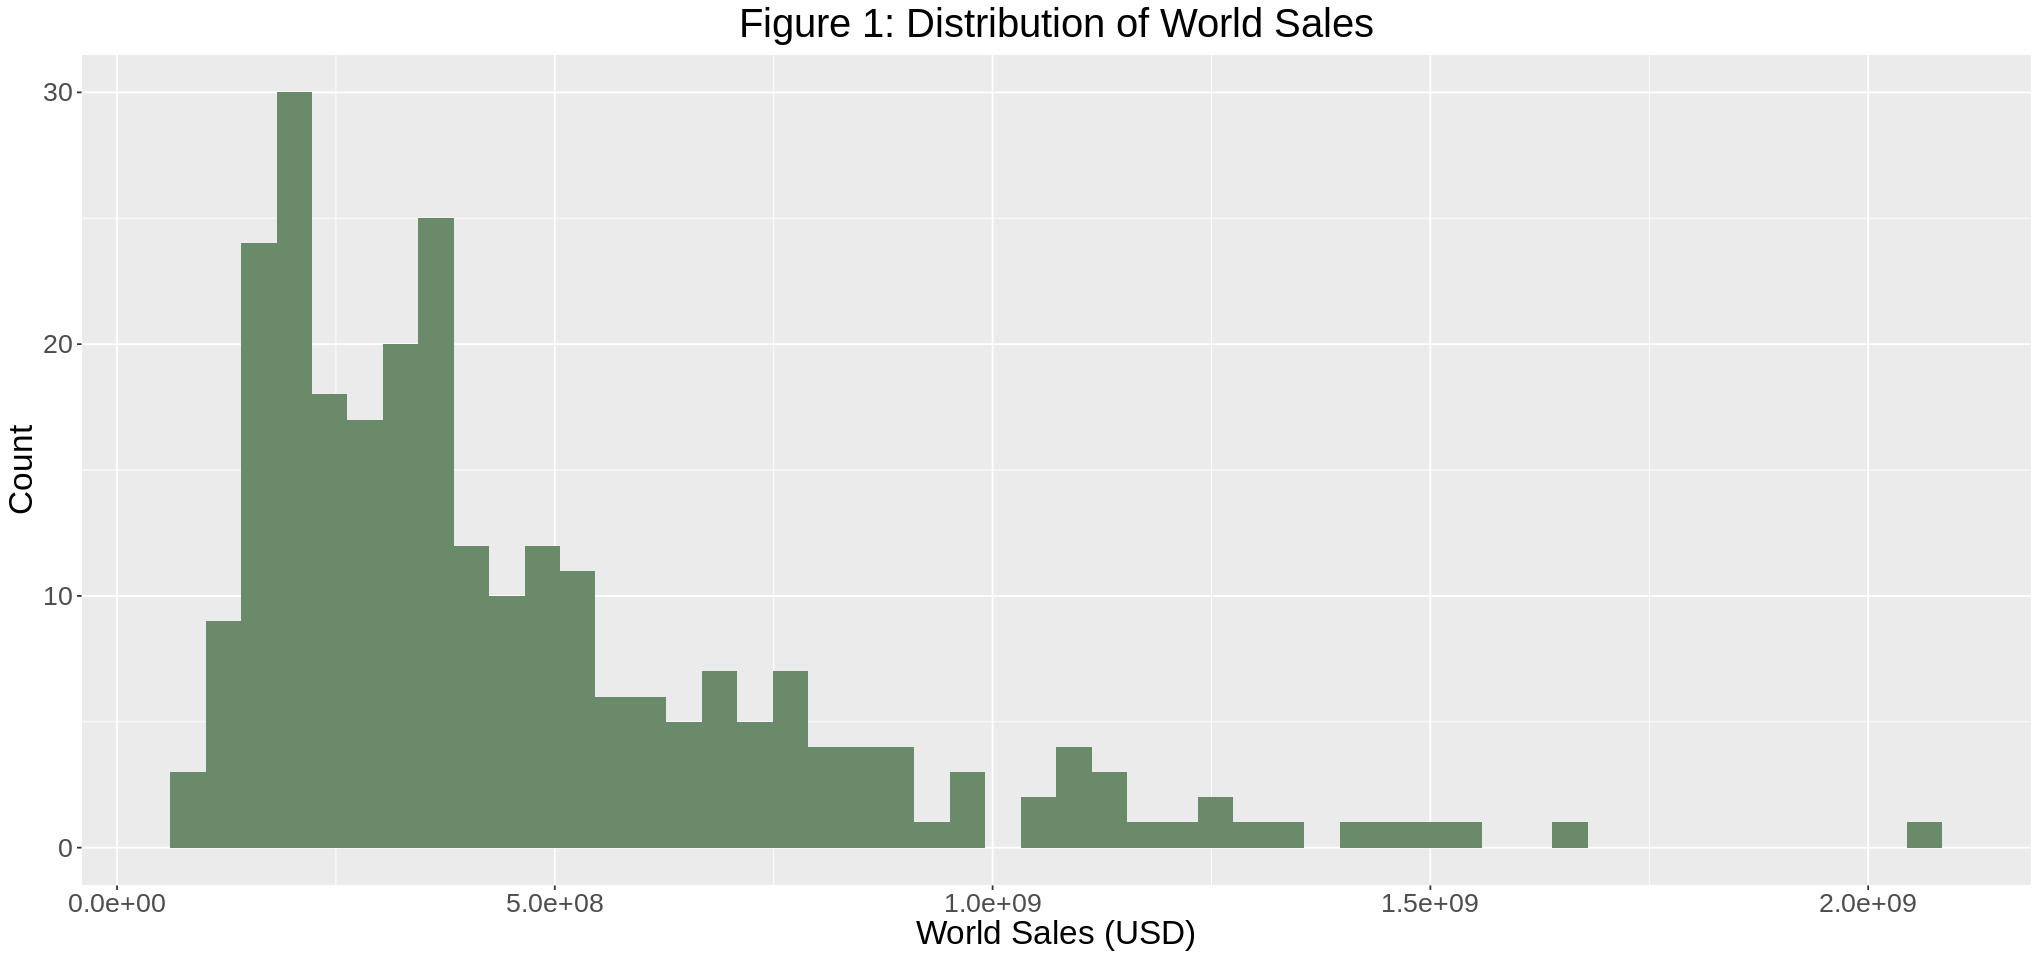

In [8]:
movies_histogram <- movies_train %>%
    ggplot(aes(x = World_Sales)) +
        geom_histogram(fill = "darkseagreen4", bins = 50) +
        xlab("World Sales (USD)") +
        ylab("Count") +
        ggtitle("Figure 1: Distribution of World Sales") +
        theme(text = element_text(size = 20),                        
                                  plot.title = element_text(hjust = 0.5))
        

options(repr.plot.width = 17, repr.plot.height = 8)
movies_histogram

In [9]:
license_estimates <- movies_train %>%
                        group_by(License) %>%
                        summarize(movies_released = n(),
                                  mean_world_sales = mean(World_Sales))

movies_by_license_plot <- license_estimates %>%
                            ggplot(aes(x = License, 
                                       y = movies_released)) + 
                            geom_bar(stat = "identity", fill = "darkseagreen4") +
                            xlab("License") +
                            ylab("Number of movies") +
                            theme(text = element_text(size = 15),
                                  legend.position = "none",                        
                                  plot.title = element_text(hjust = 0.5)) +
                            ggtitle("Figure 2: Movies Released by License") 

sales_by_license_plot <- license_estimates %>%
                            ggplot(aes(x = License, 
                                       y = mean_world_sales)) + 
                            geom_bar(stat = "identity", fill = "darkseagreen4") +
                            xlab("License") +
                            ylab("Average Sales (USD)") +
                            theme(text = element_text(size = 15),
                                  legend.position = "none",                        
                                  plot.title = element_text(hjust = 0.5)) +
                            ggtitle("Figure 3: Average Sales by License")

`summarise()` ungrouping output (override with `.groups` argument)



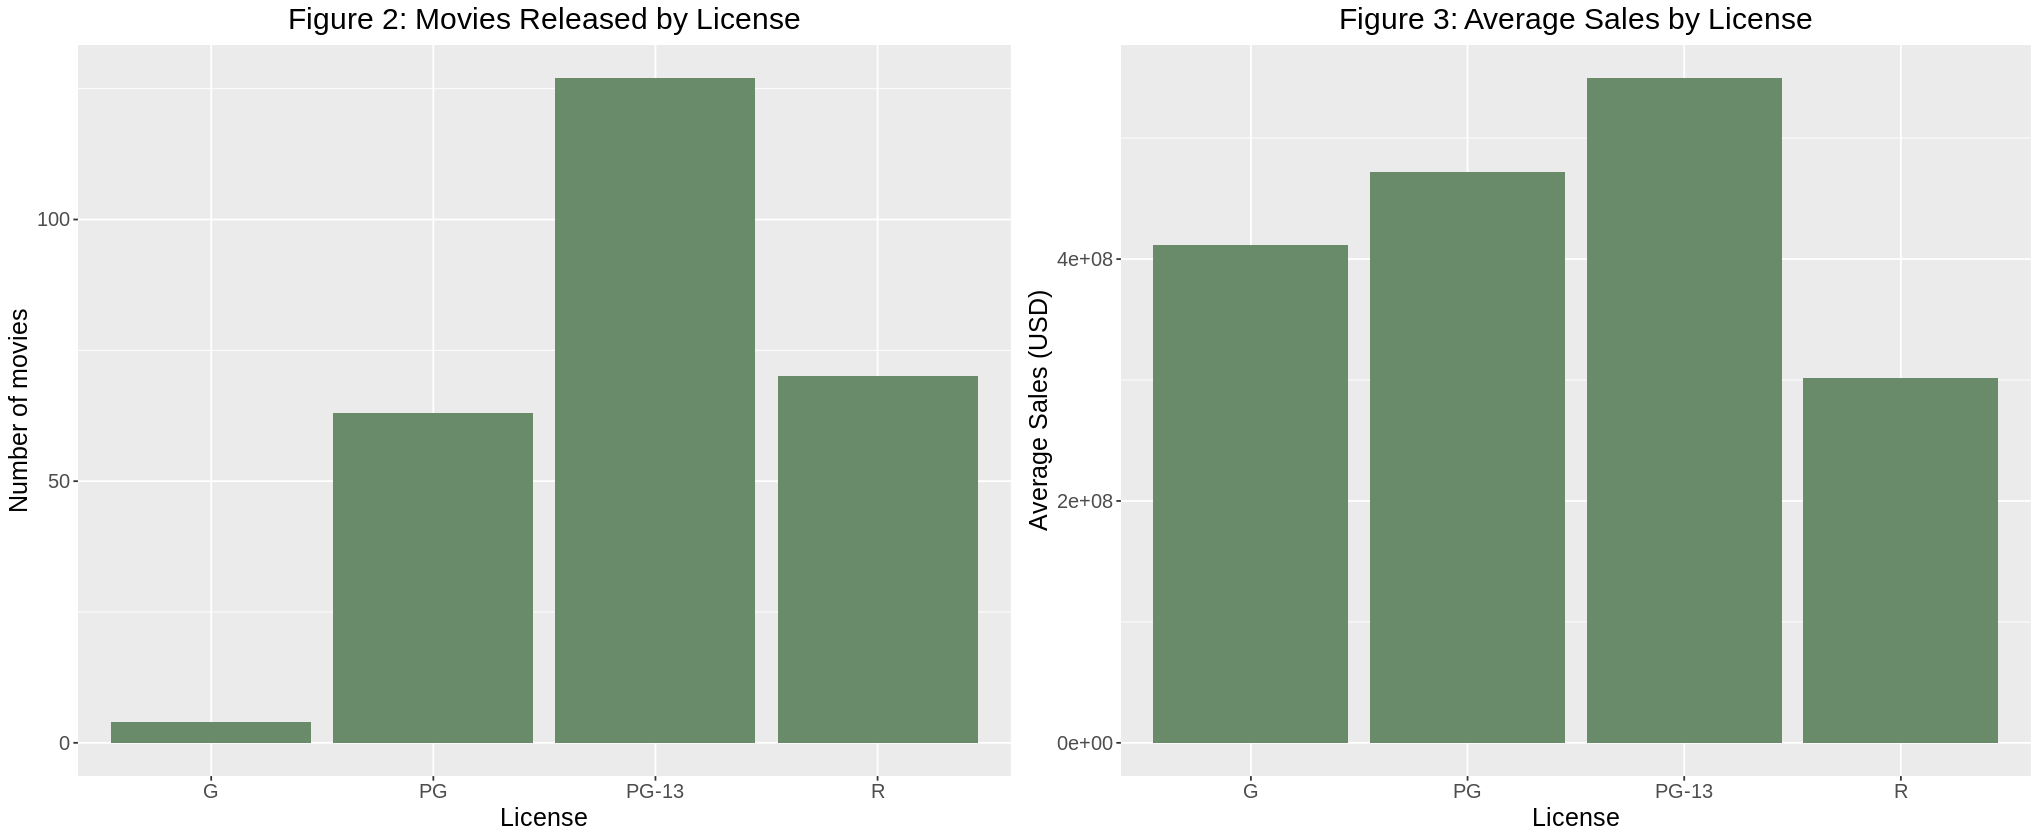

In [10]:
options(repr.plot.width = 17, repr.plot.height = 7)

grid.arrange(movies_by_license_plot, sales_by_license_plot, ncol = 2)  # plot 2 graph side-by-side for comparison

In [11]:
# visualization of movie distributors and movie sales

distributor_estimates <- movies_train %>%
                                group_by(Distributor) %>%
                                summarize(movies_released = n(),
                                          mean_world_sales = mean(World_Sales))

# plot number of movies by distributor
movies_by_distributor_plot <- distributor_estimates %>%
                                ggplot(aes(x = reorder(Distributor, movies_released), 
                                           y = movies_released)) + 
                                geom_bar(stat = "identity", fill = "darkseagreen4") +
                                xlab("Distributor") +
                                ylab("Number of movies") +
                                theme(text = element_text(size = 15),
                                      legend.position = "none",                        
                                      plot.title = element_text(hjust = 0.5)) +
                                ggtitle("Figure 4: Movies Released by Distributor") +
                                coord_flip()

# plot mean world sales by distributor
distributor_sales_plot <- distributor_estimates %>%
                            ggplot(aes(x = reorder(Distributor, mean_world_sales), 
                                       y = mean_world_sales)) + 
                            geom_bar(stat = "identity", fill = "darkseagreen4")  +
                            xlab("Distributor") +
                            ylab("Average World Sales (USD)") +
                            labs(fill = "Distributor") +
                            theme(text = element_text(size = 15),
                                  legend.position = "none",   
                                  plot.title = element_text(hjust = 0.5)) +
                            ggtitle("Figure 5: Average World Sales by Distributor") +
                            coord_flip()

`summarise()` ungrouping output (override with `.groups` argument)



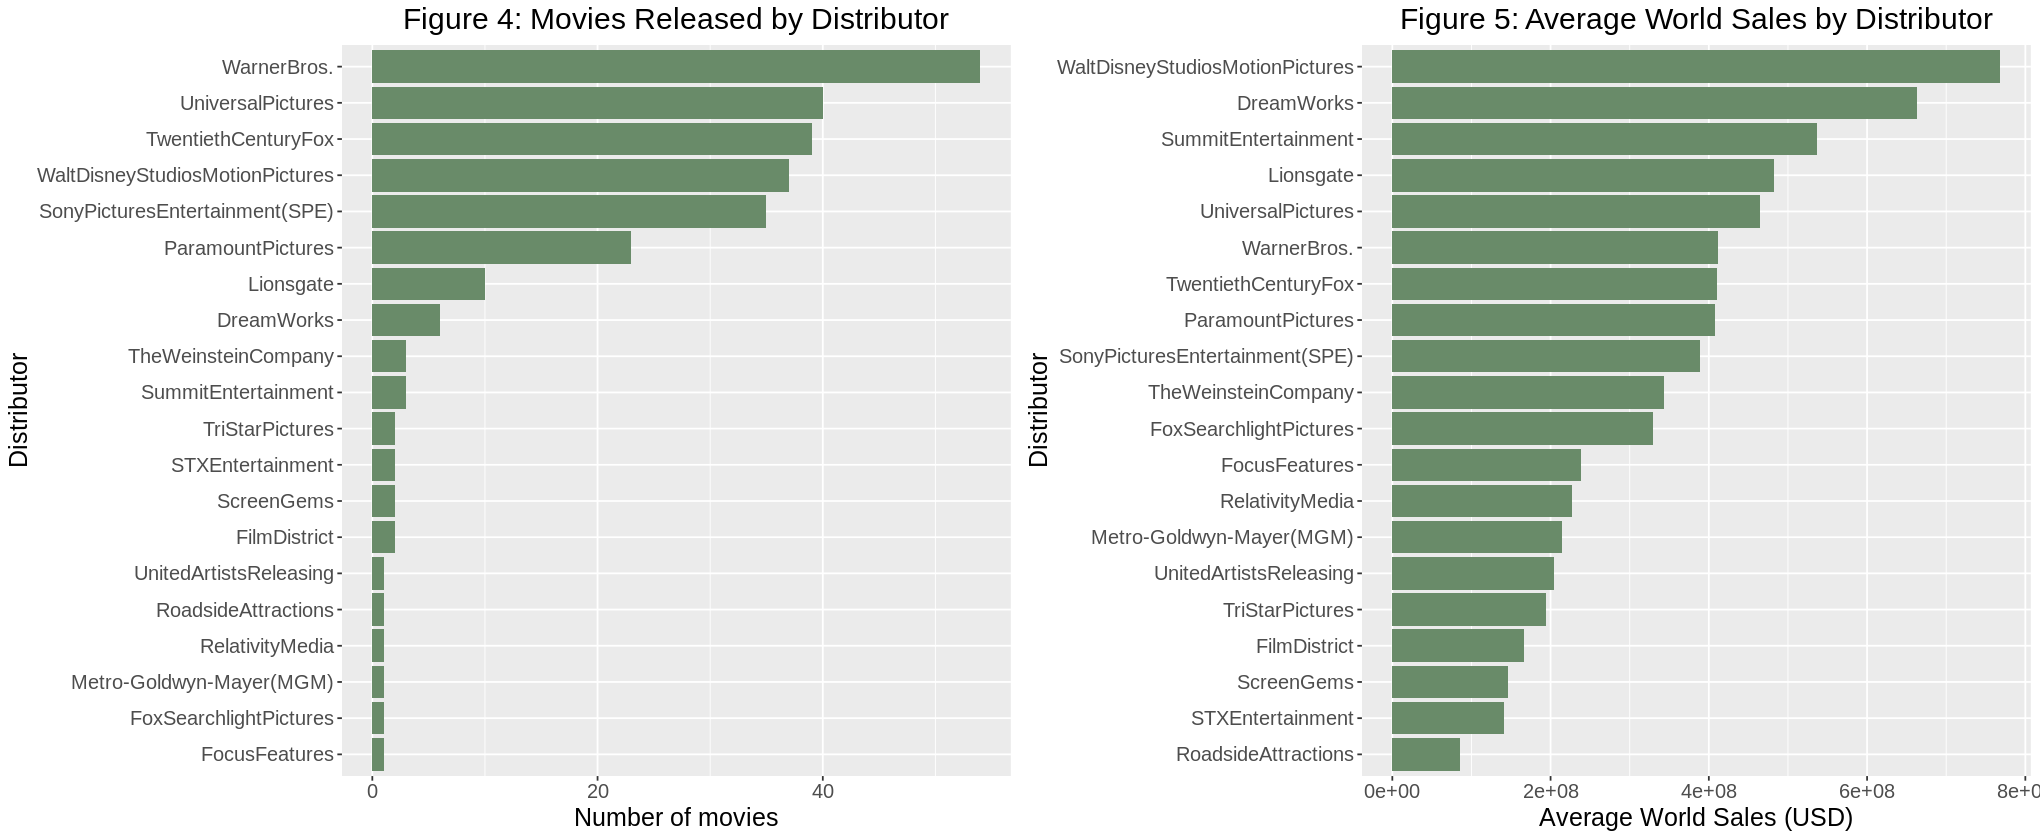

In [12]:
 # plot 2 graph side-by-side for comparison
options(repr.plot.width = 17, repr.plot.height = 7)

grid.arrange(movies_by_distributor_plot, distributor_sales_plot, ncol = 2) 

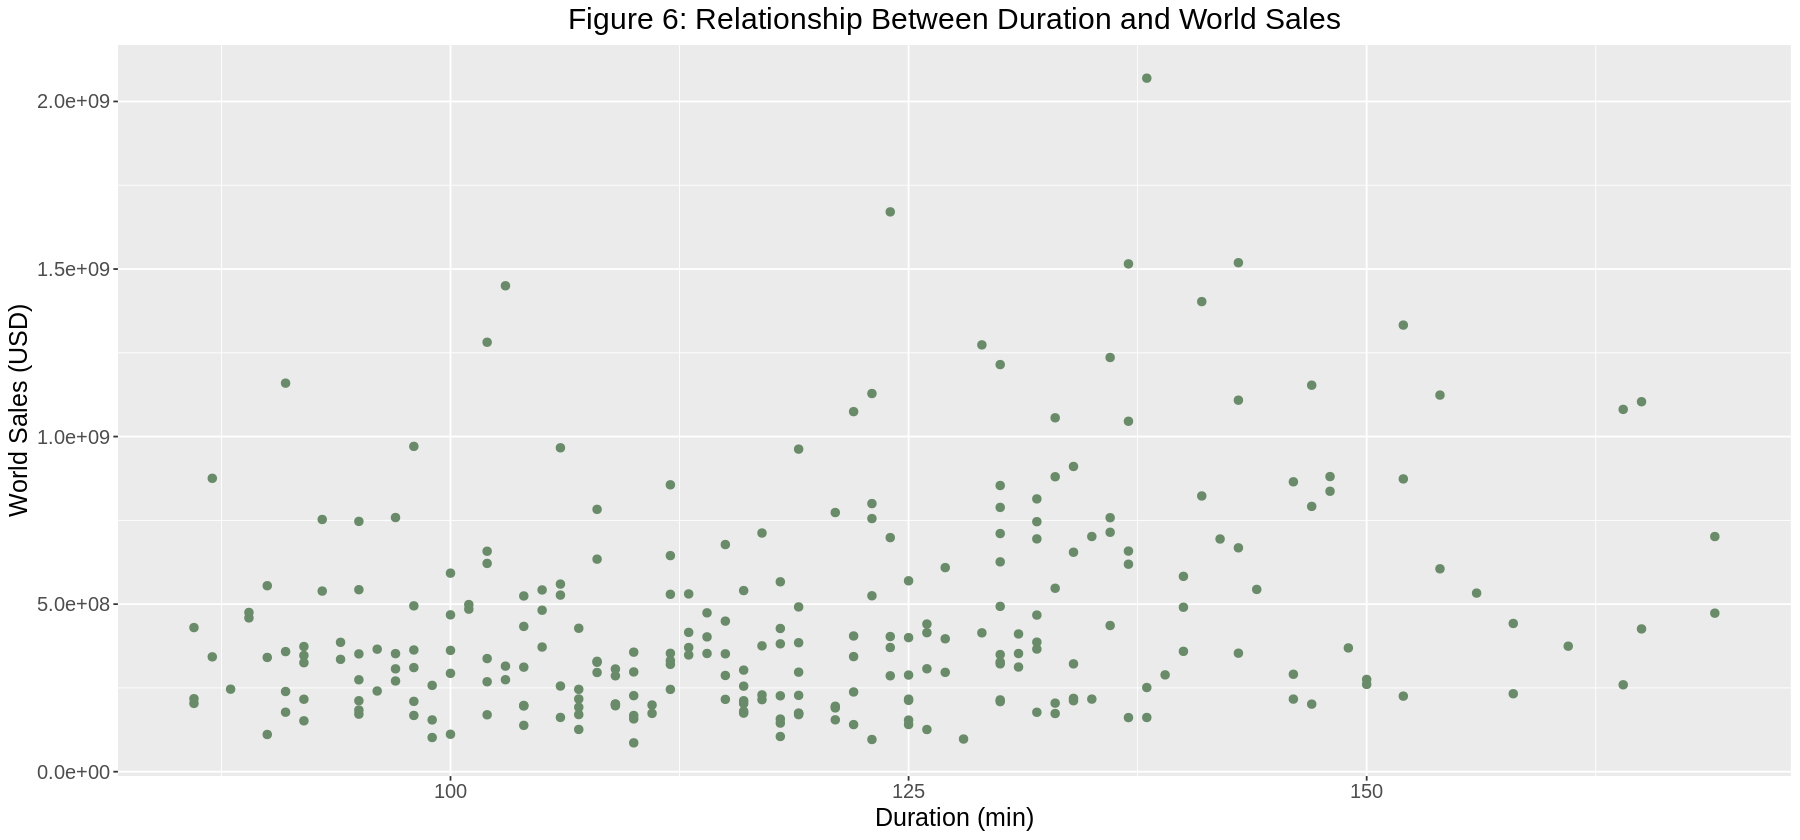

In [13]:
# plot the relationship between World Sales, Duration, and License
options(repr.plot.width = 15, repr.plot.height = 7)

duration_plot <- movies_train %>%
                    ggplot(aes(x = Duration, y = World_Sales)) +
                    geom_point(color = "darkseagreen4", size = 2) +
                    labs(x = "Duration (min)",
                         y = "World Sales (USD)") +
                    theme(text = element_text(size = 15),
                          plot.title = element_text(hjust = 0.5)) +
                    ggtitle("Figure 6: Relationship Between Duration and World Sales") 
                    
duration_plot

In [14]:
# calculate the average world sales of each genre

# define dataframe with only World_Sales and Genre columns
sales_by_genre_df <- movies_train %>%
                        select(World_Sales,Action:Documentary)

# calculate total sales of each genre
total_sales_by_genre <- sales_by_genre_df %>% 
                          mutate(across(Action:Documentary, ~ .x* World_Sales, .names = "{.col}")) %>% # multiply World_Sales by genre 
                          select(-World_Sales) %>%
                          bind_rows(purrr::map_dbl(.,sum)) %>%                                         # calculate the total sales by genre
                          tail(1) %>%
                          pivot_longer(cols = Action:Documentary,                                      # tidy the dataframe
                                       names_to = "genre",
                                       values_to = "total_sales")

# calculate number of movies in each genre
total_movies_by_genre <- sales_by_genre_df %>%
                            select(-World_Sales) %>%
                            bind_rows(purrr::map_dbl(.,sum)) %>%                                      # calculate number of movies by genre
                            tail(1) %>%
                            pivot_longer(cols = Action:Documentary,                                   # tidy the dataframe
                                         names_to = "genre",
                                         values_to = "total_movies")
# calculate average sales
avg_sales_by_genre <- merge(total_sales_by_genre, total_movies_by_genre) %>%
                                mutate(average_sales = total_sales/total_movies)                     

# plot total number of movies by genre
total_movies_by_genre_plot <- total_movies_by_genre %>%
                                    ggplot(aes(x = reorder(genre, total_movies),
                                               y = total_movies)) +
                                    geom_bar(stat = "identity", fill = "darkseagreen4") +
                                    labs(x = "Genre",
                                         y = "Number of Movies") +
                                    theme(text = element_text(size = 15),
                                          legend.position = "none",   
                                          plot.title = element_text(hjust = 0.5)) +
                                    ggtitle("Figure 7: Number of Movies by Genre") +
                                    coord_flip()

# plot average world sales by genre
avg_sales_by_genre_plot <- avg_sales_by_genre %>%
                                ggplot(aes(x = reorder(genre, average_sales), 
                                           y = average_sales)) +
                                geom_bar(stat = "identity", fill = "darkseagreen4")  +
                                labs(x = "Genre",
                                     y = "Average Sales (USD)") +
                                theme(text = element_text(size = 15),
                                      legend.position = "none",   
                                      plot.title = element_text(hjust = 0.5)) +
                                ggtitle("Figure 8: Average World Sales of Movies by Genre") +
                                coord_flip()


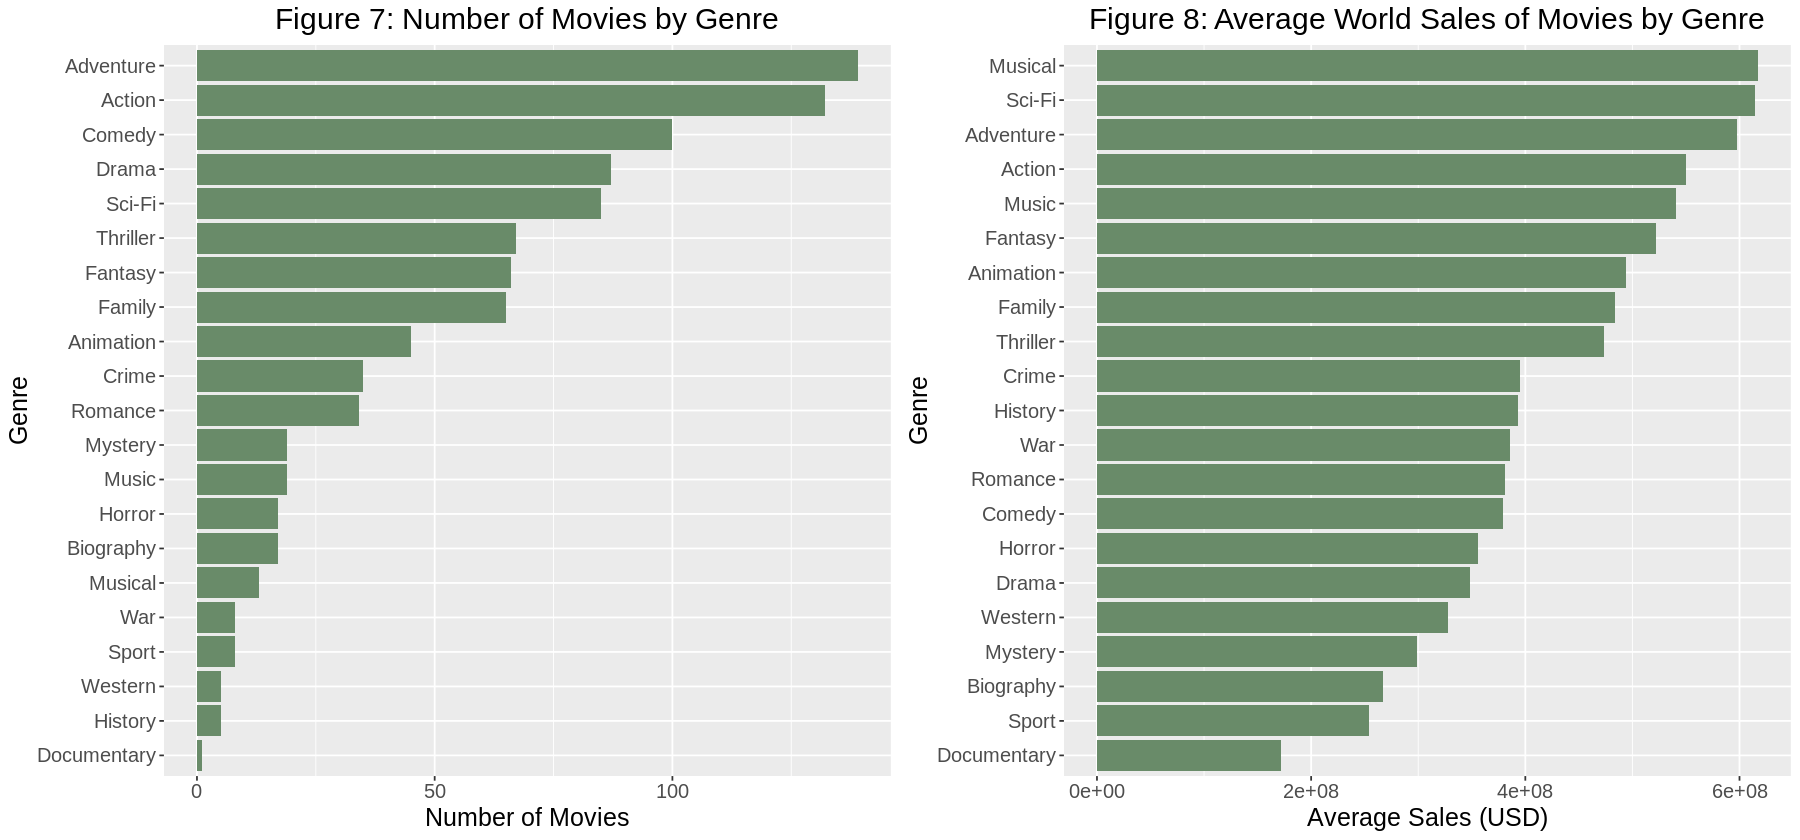

In [15]:
options(repr.plot.width = 15, repr.plot.height = 7)

grid.arrange(total_movies_by_genre_plot, avg_sales_by_genre_plot, ncol = 2) # plot 2 graphs side by side for comparison

## Regression Model

In [16]:
movies_train_num <- movies_train %>%
    mutate(License = as.numeric(License))
    
movies_test_num <- movies_test %>%
    mutate(License = as.numeric(License))

# movies_train
# glimpse(movies_train_num)
# movies_test
# movies_test_num

#### Model Using All Predictors

In [17]:
# perform cross validation

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")

movies_recipe <- recipe(World_Sales ~ ., data = movies_train_num) %>%
    step_scale(License, Duration) %>%
    step_center(License, Duration)
    

movies_vfold <- vfold_cv(movies_train_num, v = 5, strata = World_Sales)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 3))

movies_fit <- workflow() %>%
    add_recipe(movies_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = movies_vfold, grid = k_vals) %>%
    collect_metrics()

[1] "Best k: 7"


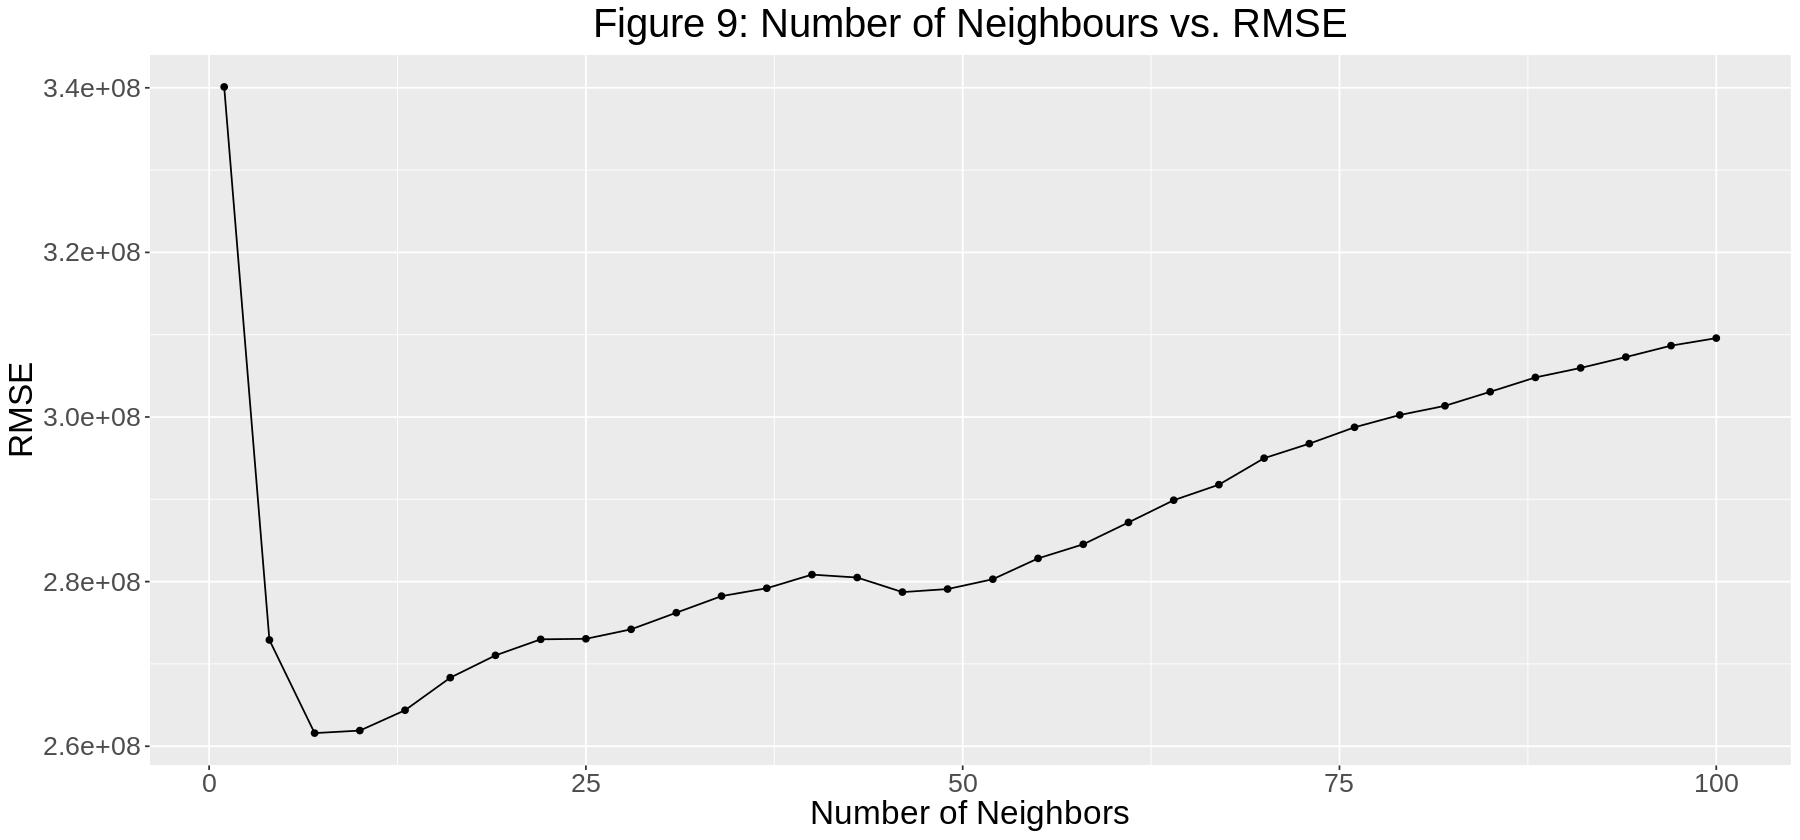

In [18]:
# determine best k

movies_cross_val_plot <- movies_fit %>%
    filter(.metric == "rmse") %>%
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        xlab("Number of Neighbors") +
        ylab("RMSE") +
        theme(text = element_text(size = 20),   
              plot.title = element_text(hjust = 0.5)) +
        ggtitle("Figure 9: Number of Neighbours vs. RMSE")

best_k <- movies_fit %>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>%
    slice(1) %>%
    pull(neighbors)

movies_cross_val_plot 
print(paste("Best k:", as.character(best_k)))

In [19]:
# train and test regression model

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
    set_engine("kknn") %>%
    set_mode("regression")

movies_best_fit <- workflow() %>%
    add_recipe(movies_recipe) %>%
    add_model(knn_best_spec) %>%
    fit(movies_train_num)

movies_rmse <- predict(movies_best_fit, movies_train_num) %>%
    bind_cols(movies_train_num) %>%
    metrics(truth = World_Sales, estimate = .pred) %>%
    filter(.metric == "rmse") %>%
    pull(.estimate)
print(paste("RMSE:", as.character(movies_rmse)))

movies_rmspe <- predict(movies_best_fit, movies_test_num) %>%
    bind_cols(movies_test_num) %>%
    metrics(truth = World_Sales, estimate = .pred) %>%
    filter(.metric == "rmse") %>%
    pull(.estimate)
print(paste("RMSPE:", as.character(movies_rmspe)))

[1] "RMSE: 231720658.749169"
[1] "RMSPE: 356892055.249929"


#### Visualization of model

In [20]:
## define data frame for predicted and actual sales

movies_pred <- predict(movies_best_fit, movies_test_num) %>%
                     bind_cols(movies_test_num) 

In [21]:
# general visualization of results

# tidy the data
movies_pred_2 <- movies_pred %>%
                    pivot_longer(cols = c(.pred, World_Sales),
                                 names_to = "type",
                                 values_to = "sales")

movies_pred_plot <- movies_pred_2 %>%
                 ggplot(aes(x = type, 
                             y = sales,
                             fill = type)) +
                 geom_boxplot() +
                 theme(text = element_text(size = 30),
                       plot.title = element_text(hjust = 0.5),
                       legend.position = "none") +
                       ggtitle("Figure 10: Predicted vs Actual World Sales") +
                       ylab("World Sales (USD)") +
                       xlab("Type") +
                       scale_fill_manual(values = c("dodgerblue3", "darkseagreen")) +
                       scale_x_discrete(labels = c("Predicted", "Actual"))

In [22]:
# visualization for distributor and world sales
movies_distr <- movies_pred %>%
                    group_by(Distributor) %>%
                    summarize(mean_pred_sales = mean(.pred),
                              mean_world_sales = mean(World_Sales)) %>%
                    pivot_longer(cols = mean_pred_sales:mean_world_sales,
                                 names_to = "type",
                                 values_to = "sales")

movies_distr_plot <- ggplot(movies_distr, aes(x = reorder(Distributor, sales), 
                                                y = sales,
                                                fill = type)) + 
                            geom_bar(stat = "identity", position = "dodge", width = 0.7)  +
                            xlab("Distributor") +
                            ylab("Average World Sales (USD)") +
                            labs(fill = "Type") +
                            theme(text = element_text(size = 25),   
                                  plot.title = element_text(hjust = 0.5)) +
                            ggtitle("Figure 11: Average World Sales by Distributor") +
                            scale_fill_manual(values = c("dodgerblue3", "darkseagreen"),
                                         labels = c("Predicted", "Actual")) +
                            coord_flip()

`summarise()` ungrouping output (override with `.groups` argument)



In [23]:
## visualization for genre & world sales

# create subset with only World_Sales and Genre columns
pred_by_genre <- movies_pred %>%
                    select(Action:Documentary, World_Sales, .pred)%>% 
                    mutate(across(Action:Documentary, ~ .x * .pred, .names = "{.col}")) %>%  
                    select(-World_Sales, -.pred) %>%
                    bind_rows(purrr::map_dbl(.,sum)) %>%
                    select(Action:Documentary) %>%
                    tail(1) %>%
                    pivot_longer(cols = Action:Documentary,                                     
                                 names_to = "genre",
                                 values_to = "pred_sales")

# calculate mean predicted sales
avg_sales_by_genre_2 <- merge(avg_sales_by_genre, pred_by_genre) %>%
                            mutate(.pred_avg_sales = pred_sales/total_movies) %>%              # named the column .pred_avg_sales for consistent color scheme to other figures
                            select(genre, .pred_avg_sales, average_sales) %>%
                            pivot_longer(cols = .pred_avg_sales:average_sales,
                                 names_to = "type",
                                 values_to = "avg_sales")

avg_sales_by_genre_2_plot <- ggplot(avg_sales_by_genre_2 , aes(x = reorder(genre, avg_sales),  # sort by highest average actual sales
                                                               y = avg_sales,
                                                               fill = type)) + 
                                geom_bar(stat = "identity", position = "dodge", width = 0.7)  +
                                labs(fill = "Type",
                                     y = "Average World Sales (USD)",
                                     x = "Genre") +
                                theme(text = element_text(size = 25),   
                                      plot.title = element_text(hjust = 0.5)) +
                                ggtitle("Figure 12: Average World Sales by Genre") +
                                scale_fill_manual(values = c("dodgerblue3", "darkseagreen"),
                                         labels = c("Predicted", "Actual")) +
                                coord_flip()

In [24]:
## visualization for license and world_sales

license_plot <- movies_pred_2 %>%
                 ggplot( aes(x = reorder(License, sales), 
                             y = sales,
                             fill = type)) +
                 geom_boxplot() +
                 theme(text = element_text(size = 25),
                       plot.title = element_text(hjust = 0.5)) +
                       ggtitle("Figure 13: World Sales by License") +
                       ylab("World Sales (USD)") +
                       xlab("License") +
                       labs(fill = "Type") +
                       scale_fill_manual(values = c("dodgerblue3", "darkseagreen"),
                                         labels = c("Predicted", "Actual")) +
                       scale_x_discrete(labels = c("R", "PG-13","PG","G"))


In [25]:
## visualization for duration and world sales

duration_plot_2 <- movies_pred %>%
                    ggplot(aes(x = Duration, y = World_Sales)) +
                                            geom_point(color = "darkgreen") +
                                            geom_line(aes(y = .pred),
                                                      col = "dodgerblue3")  +
                                            xlab("Duration (min)") +
                                            ylab("World Sales (USD)") +
                                            theme(text = element_text(size = 25),   
                                                  plot.title = element_text(hjust = 0.5)) +
                                            ggtitle("Figure 14: Relationship Between Duration and World Sales") +
                                            scale_color_brewer(labels = c("Predicted", "Actual")) 


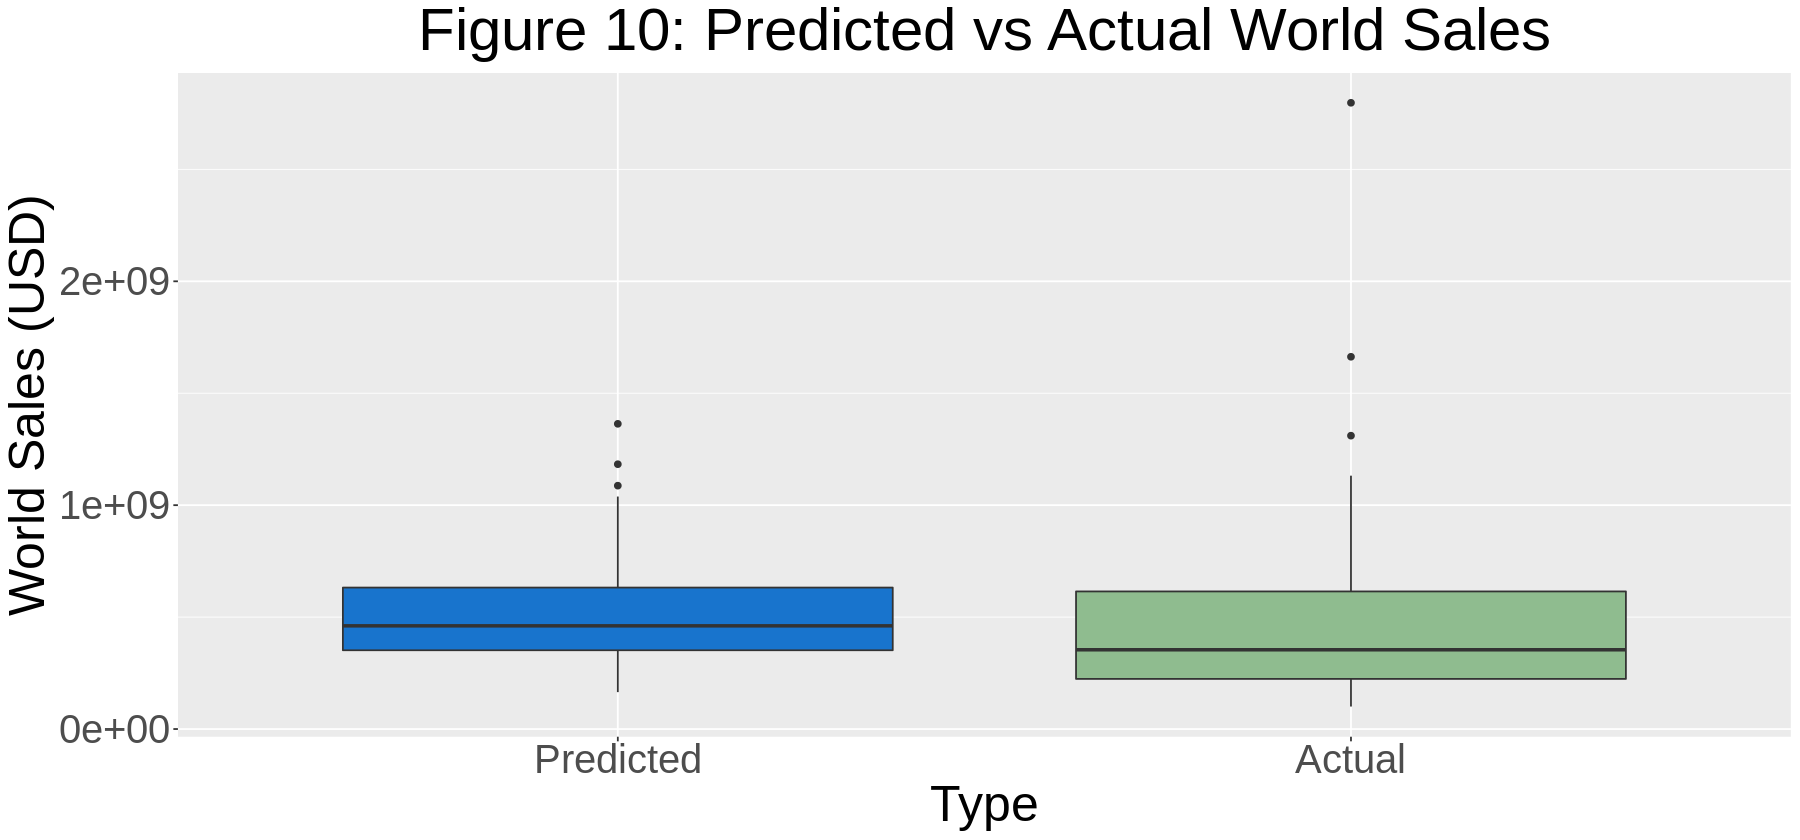

In [26]:
movies_pred_plot

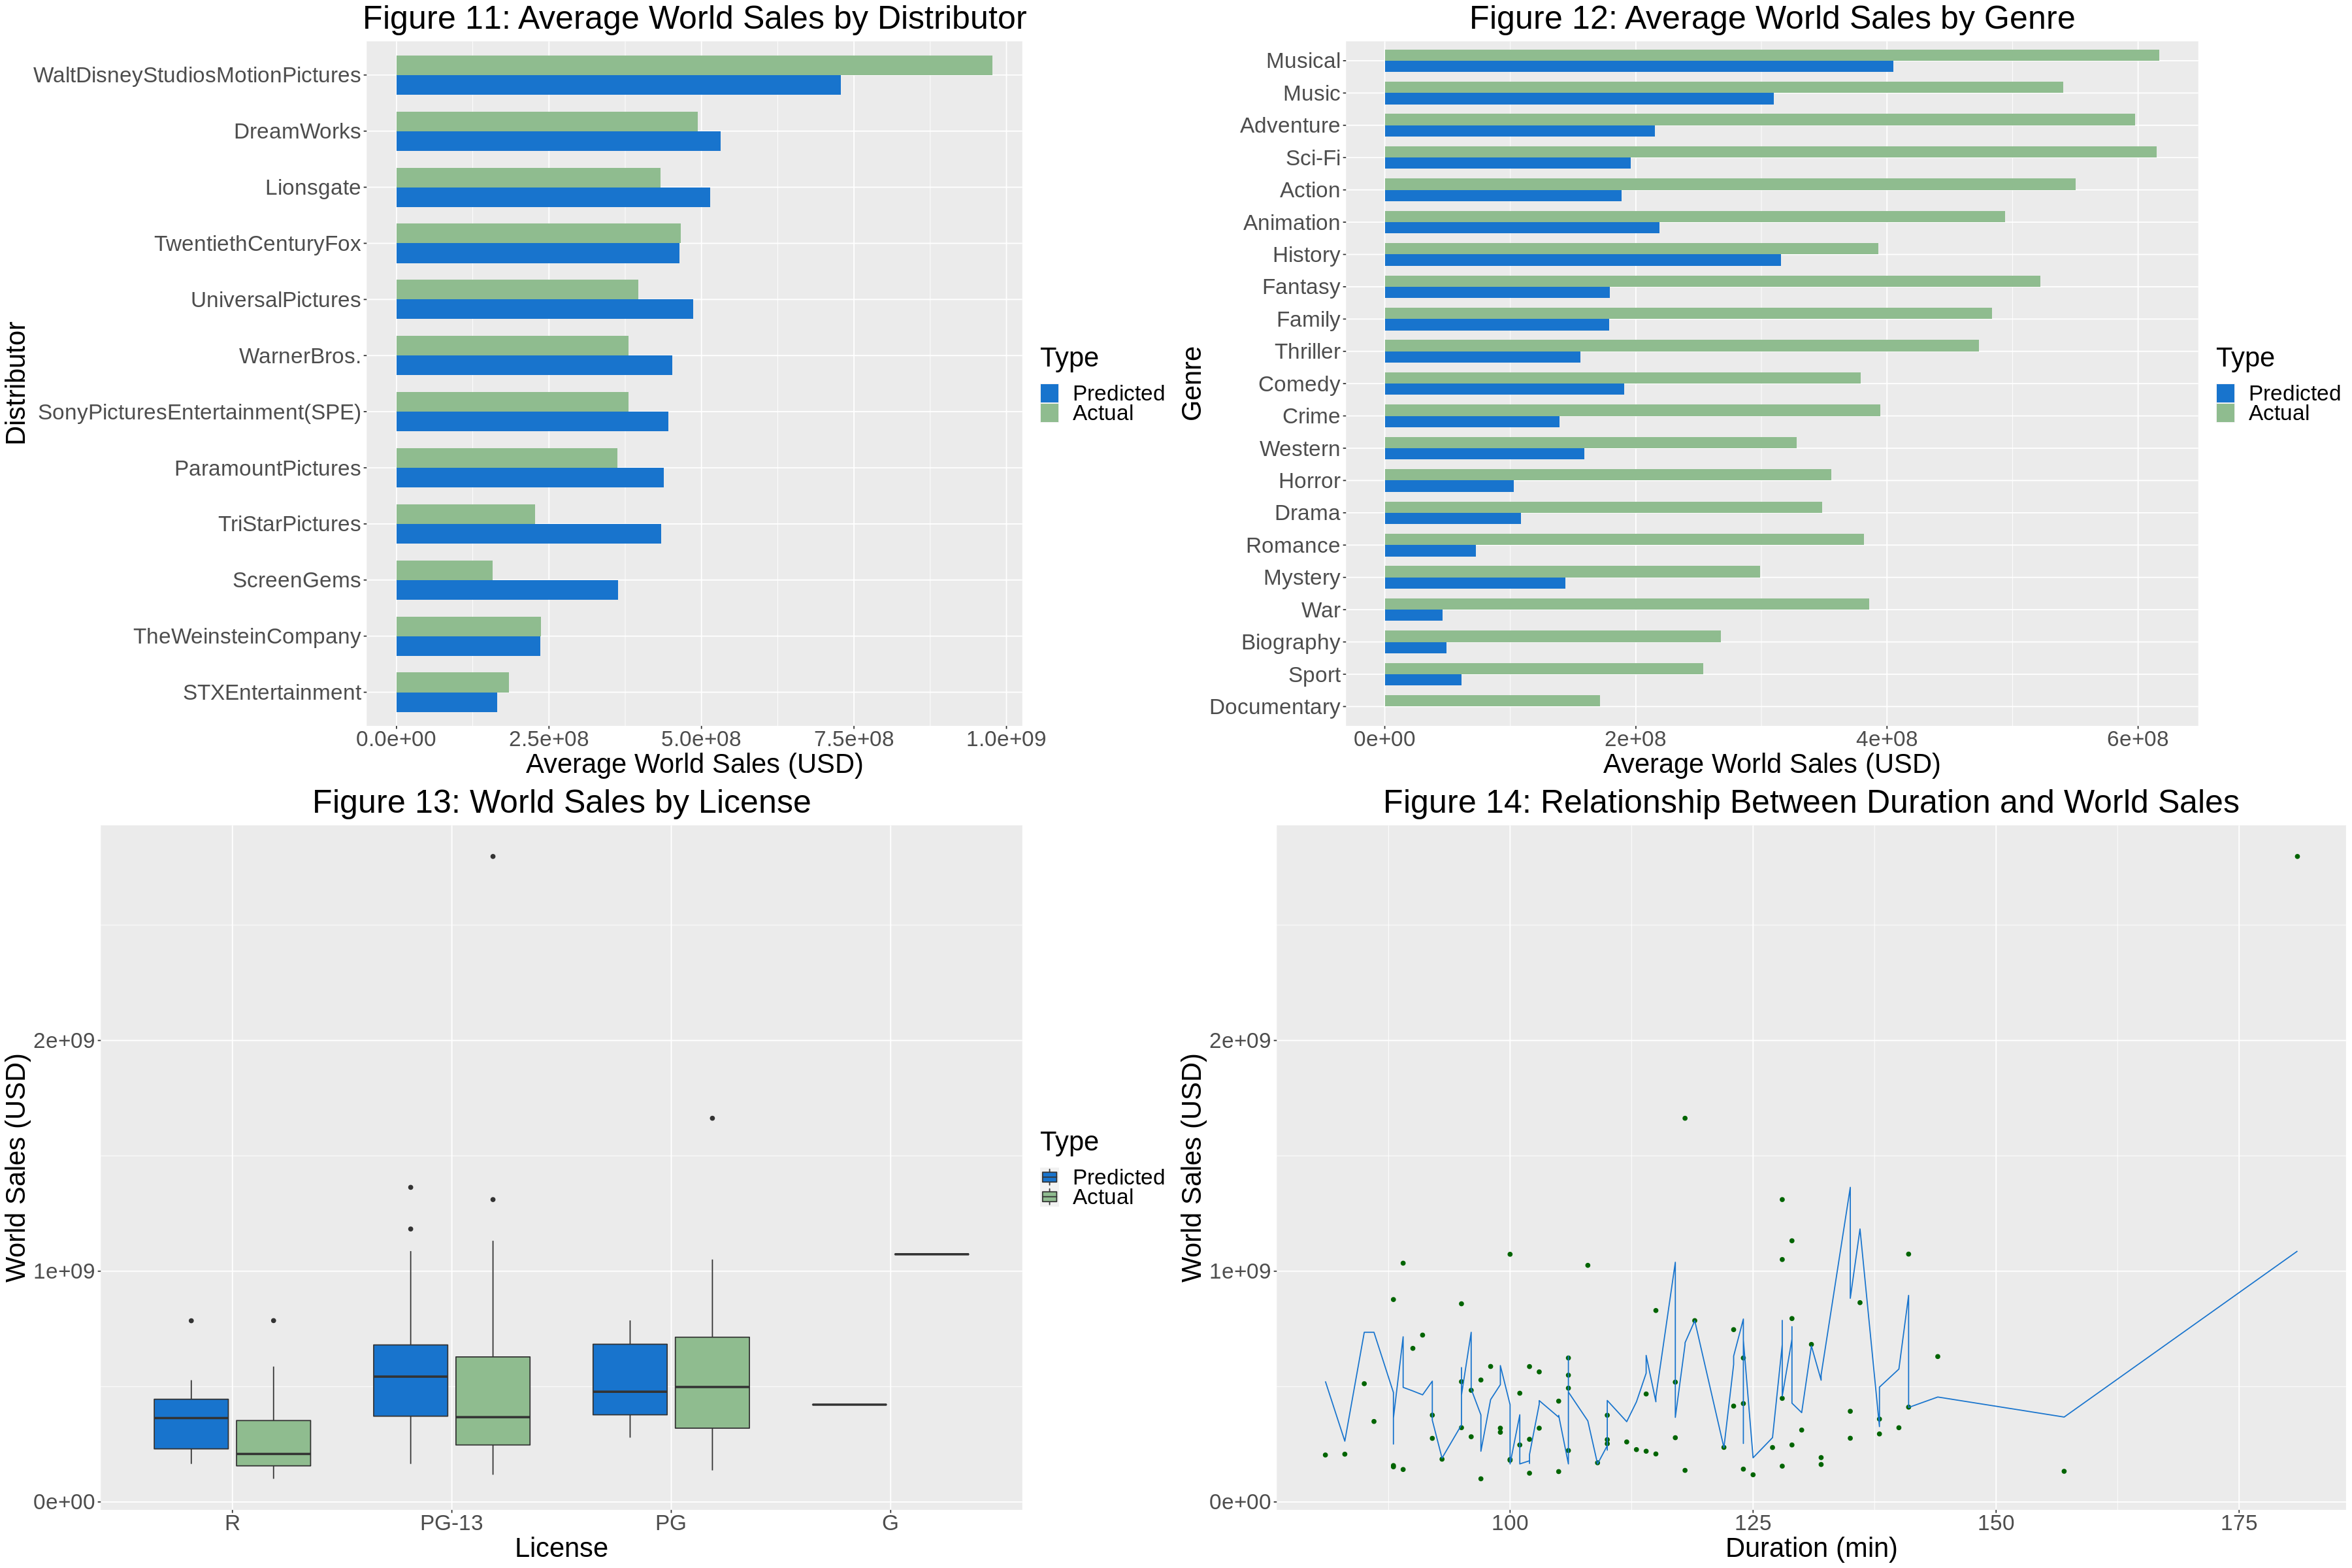

In [27]:
options(repr.plot.width = 30, repr.plot.height = 20)
grid.arrange(movies_distr_plot, avg_sales_by_genre_2_plot, license_plot, duration_plot_2, ncol = 2)

## Discussion

| Model                           | Best k | RMSE      | RMSPE     |
|---------------------------------|--------|-----------|-----------|
| Using All Predictors            | 7      | 231720658 | 356892055 |
| Excluding Genres as Predictors  | 25     | 279299981 | 355974691 |
| Excluding Duration as Predictor | 22     | 276899991 | 370145755 |


## References